# 1. Análisis de Series de Tiempo II

Aquí haremos la prueba de generar las series de tiempo, pero esta vez ordenando los datos previamente a partir de la columna `'created_at'`.

## Setup

In [1]:
import sys, os
sys.path.append(os.getcwd().replace('/notebooks',''))  # Replace with current directory name

In [2]:
#===== Configuración regional =================================
import locale

# Name might vary with operating system.
locale.setlocale(locale.LC_ALL, 'es_ES')

locale._override_localeconv["thousands_sep"] = "."

#===== Librerías ==============================================
# Importing the Warnings library for better presentation
import warnings

# Importando la biblioteca pandas para manipulación y análisis de datos
import pandas as pd
# Importando NumPy para operaciones numéricas y manipulación de arreglos
import numpy as np
# Importando itertools para generar combinaciones de columnas
import itertools

# Importando matplotlib.pyplot para crear gráficos y visualizaciones
import matplotlib.pyplot as plt
# Importando Seaborn para visualización de datos estadísticos (opcional, pero puede complementar a Plotly)
import seaborn as sns
# Importando Plotly Express para visualizaciones interactivas de alto nivel y fáciles de usar
import plotly.express as px
# Importando Plotly Graph Objects para un control más detallado sobre las visualizaciones
import plotly.graph_objects as go
# Multiple graphs in a figure
from plotly.subplots import make_subplots

# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose

#===== Ajustes visualización gráficos ============================
warnings.filterwarnings('ignore', category=DeprecationWarning)
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'
warnings.resetwarnings()

# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

#===== Librerías proyecto ============================
from utils.data import Datasets
from utils.eda import column_explore


## Carga inicial de datos

In [3]:
ds = Datasets()
cash_orig, fees_orig = ds.get_original_datasets()

In [11]:
cash, fees = ds.get_datasets()

## Ordenación de los Datos

### Dataset cash_request

In [12]:
cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,804
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00:00,NaN,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,231
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,191
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00:00,NaN,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,761
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00:00,NaN,2020-06-05 22:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,7686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681.0,NaT,NaN,2021-02-06 11:00:00+00:00,2020-10-13 00:00:00+00:00,2021-02-06 20:17:49.257521+00:00,instant,2020-10-12 13:54:24.352856+00:00,NaN,NaT,NaT,13681
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,NaN,NaT,30367.0,2020-11-03 22:00:00+00:00,2020-10-28 00:00:00+00:00,2020-12-01 13:26:53.787672+00:00,instant,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00:00,2020-12-01 13:26:53.815504+00:00,30367
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-21 00:00:00+00:00,2021-02-05 12:19:30.626289+00:00,instant,2020-10-20 07:58:14.171553+00:00,NaN,NaT,NaT,82122
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-12 00:00:00+00:00,2021-02-05 13:14:19.689906+00:00,instant,2020-10-10 05:41:23.368363+00:00,NaN,NaT,NaT,64517


In [6]:
cash.sort_values(by='created_at')

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47.0,2019-11-20 12:16:50+00:00,NaN,2019-12-05 23:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,47
7260,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,NaN,2019-12-09 14:58:28+00:00,1309.0,2019-12-16 23:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,1309
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,804
10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812.0,2019-12-11 09:40:33+00:00,NaN,2020-02-05 23:00:00+00:00,2019-12-11 00:00:00+00:00,NaT,regular,NaT,pending,2020-03-20 14:12:53.208246+00:00,2020-12-18 22:47:48.008850+00:00,812
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916.0,NaT,NaN,2020-11-12 22:00:00+00:00,2020-11-02 00:00:00+00:00,2020-11-12 19:39:20.241980+00:00,instant,2020-11-01 23:08:07.414160+00:00,NaN,NaT,NaT,55916
21919,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339.0,NaT,NaN,2020-11-29 11:00:00+00:00,2020-11-02 00:00:00+00:00,2020-11-29 19:27:43.055298+00:00,instant,2020-11-01 23:12:16.335916+00:00,NaN,NaT,NaT,39339
7088,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505.0,2020-11-02 09:06:37.162733+00:00,NaN,2020-11-24 23:51:00+00:00,NaT,NaT,instant,2020-11-01 23:13:28.791529+00:00,NaN,NaT,NaT,24505
14725,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781.0,NaT,NaN,2020-12-04 11:00:00+00:00,NaT,2020-12-02 14:17:37.433540+00:00,instant,2020-11-01 23:16:12.720278+00:00,NaN,NaT,NaT,100781


In [7]:
cash_by_creation = cash.sort_values('created_at')
cash_by_creation.reset_index(drop=True, inplace=True)
cash_by_creation

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_usuario
0,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47.0,2019-11-20 12:16:50+00:00,NaN,2019-12-05 23:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,47
1,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,NaN,2019-12-09 14:58:28+00:00,1309.0,2019-12-16 23:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,1309
2,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,804
3,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812.0,2019-12-11 09:40:33+00:00,NaN,2020-02-05 23:00:00+00:00,2019-12-11 00:00:00+00:00,NaT,regular,NaT,pending,2020-03-20 14:12:53.208246+00:00,2020-12-18 22:47:48.008850+00:00,812
4,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916.0,NaT,NaN,2020-11-12 22:00:00+00:00,2020-11-02 00:00:00+00:00,2020-11-12 19:39:20.241980+00:00,instant,2020-11-01 23:08:07.414160+00:00,NaN,NaT,NaT,55916
23966,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339.0,NaT,NaN,2020-11-29 11:00:00+00:00,2020-11-02 00:00:00+00:00,2020-11-29 19:27:43.055298+00:00,instant,2020-11-01 23:12:16.335916+00:00,NaN,NaT,NaT,39339
23967,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505.0,2020-11-02 09:06:37.162733+00:00,NaN,2020-11-24 23:51:00+00:00,NaT,NaT,instant,2020-11-01 23:13:28.791529+00:00,NaN,NaT,NaT,24505
23968,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781.0,NaT,NaN,2020-12-04 11:00:00+00:00,NaT,2020-12-02 14:17:37.433540+00:00,instant,2020-11-01 23:16:12.720278+00:00,NaN,NaT,NaT,100781


### Dataset fees

In [13]:
fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,NaT,NaT,after
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,NaT,NaT,after
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,NaT,NaT,after
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,NaT,NaT,after
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,NaT,NaT,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.180490+00:00,2020-11-17 05:14:00.080854+00:00,NaT,NaT,after
21057,20768,26764,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00:00,NaT,NaT,after
21058,18779,25331,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.749200+00:00,2020-11-18 04:35:42.915511+00:00,NaT,NaT,after
21059,16542,23628,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00:00,2020-12-18 05:18:01.465317+00:00,NaT,NaT,after


In [14]:
fees.sort_values(by='created_at')

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1490,59,2266,postpone,accepted,NaN,5.0,Postpone Cash Request 2266,2020-05-29 14:27:50.787961+00:00,2020-10-13 14:25:01.331335+00:00,NaT,2020-06-07 22:00:00+00:00,2020-06-22 22:00:00+00:00,before
1214,56,2117,postpone,accepted,NaN,5.0,Postpone Cash Request 2117,2020-05-29 14:27:51.485810+00:00,2020-10-13 14:25:00.798406+00:00,NaT,2020-06-06 07:12:58.842000+00:00,2020-06-21 07:04:34.870000+00:00,before
20555,60,1503,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 14:27:51.918286+00:00,2021-01-19 11:48:33.723620+00:00,NaT,2020-06-19 22:00:00+00:00,2020-07-04 22:00:00+00:00,before
1231,57,1503,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 14:27:51.918286+00:00,2021-01-19 11:48:38.504628+00:00,NaT,2020-07-04 22:00:00+00:00,2020-07-19 22:00:00+00:00,before
1212,48,1923,postpone,accepted,NaN,5.0,Postpone Cash Request 1923,2020-05-29 14:27:52.869282+00:00,2020-10-13 14:25:00.796130+00:00,NaT,2020-06-06 22:00:00+00:00,2020-06-21 22:00:00+00:00,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,21189,22393,postpone,cancelled,NaN,5.0,Postpone Cash Request 22393,2020-11-01 23:34:53.569592+00:00,2020-11-01 23:34:53.569614+00:00,NaT,2020-11-19 11:00:00+00:00,2020-12-07 11:00:00+00:00,before
597,21190,23328,postpone,cancelled,NaN,5.0,Postpone Cash Request 23328,2020-11-01 23:36:16.237708+00:00,2020-11-01 23:36:16.237731+00:00,NaT,2020-11-07 10:10:11.866000+00:00,2020-11-30 23:00:00+00:00,before
634,21191,23535,postpone,cancelled,NaN,5.0,Postpone Cash Request 23535,2020-11-01 23:37:37.474627+00:00,2020-11-01 23:37:37.474692+00:00,NaT,2020-11-02 11:00:00+00:00,2020-11-12 11:00:00+00:00,before
653,21192,23535,postpone,cancelled,NaN,5.0,Postpone Cash Request 23535,2020-11-01 23:37:53.673368+00:00,2020-11-01 23:37:53.673390+00:00,NaT,2020-11-02 11:00:00+00:00,2020-11-12 11:00:00+00:00,before


In [15]:
fees_by_creation = fees.sort_values('created_at')
fees_by_creation.reset_index(drop=True, inplace=True)
fees_by_creation

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,59,2266,postpone,accepted,NaN,5.0,Postpone Cash Request 2266,2020-05-29 14:27:50.787961+00:00,2020-10-13 14:25:01.331335+00:00,NaT,2020-06-07 22:00:00+00:00,2020-06-22 22:00:00+00:00,before
1,56,2117,postpone,accepted,NaN,5.0,Postpone Cash Request 2117,2020-05-29 14:27:51.485810+00:00,2020-10-13 14:25:00.798406+00:00,NaT,2020-06-06 07:12:58.842000+00:00,2020-06-21 07:04:34.870000+00:00,before
2,60,1503,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 14:27:51.918286+00:00,2021-01-19 11:48:33.723620+00:00,NaT,2020-06-19 22:00:00+00:00,2020-07-04 22:00:00+00:00,before
3,57,1503,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 14:27:51.918286+00:00,2021-01-19 11:48:38.504628+00:00,NaT,2020-07-04 22:00:00+00:00,2020-07-19 22:00:00+00:00,before
4,48,1923,postpone,accepted,NaN,5.0,Postpone Cash Request 1923,2020-05-29 14:27:52.869282+00:00,2020-10-13 14:25:00.796130+00:00,NaT,2020-06-06 22:00:00+00:00,2020-06-21 22:00:00+00:00,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,21189,22393,postpone,cancelled,NaN,5.0,Postpone Cash Request 22393,2020-11-01 23:34:53.569592+00:00,2020-11-01 23:34:53.569614+00:00,NaT,2020-11-19 11:00:00+00:00,2020-12-07 11:00:00+00:00,before
21057,21190,23328,postpone,cancelled,NaN,5.0,Postpone Cash Request 23328,2020-11-01 23:36:16.237708+00:00,2020-11-01 23:36:16.237731+00:00,NaT,2020-11-07 10:10:11.866000+00:00,2020-11-30 23:00:00+00:00,before
21058,21191,23535,postpone,cancelled,NaN,5.0,Postpone Cash Request 23535,2020-11-01 23:37:37.474627+00:00,2020-11-01 23:37:37.474692+00:00,NaT,2020-11-02 11:00:00+00:00,2020-11-12 11:00:00+00:00,before
21059,21192,23535,postpone,cancelled,NaN,5.0,Postpone Cash Request 23535,2020-11-01 23:37:53.673368+00:00,2020-11-01 23:37:53.673390+00:00,NaT,2020-11-02 11:00:00+00:00,2020-11-12 11:00:00+00:00,before


## Series de Tiempo para cash_request

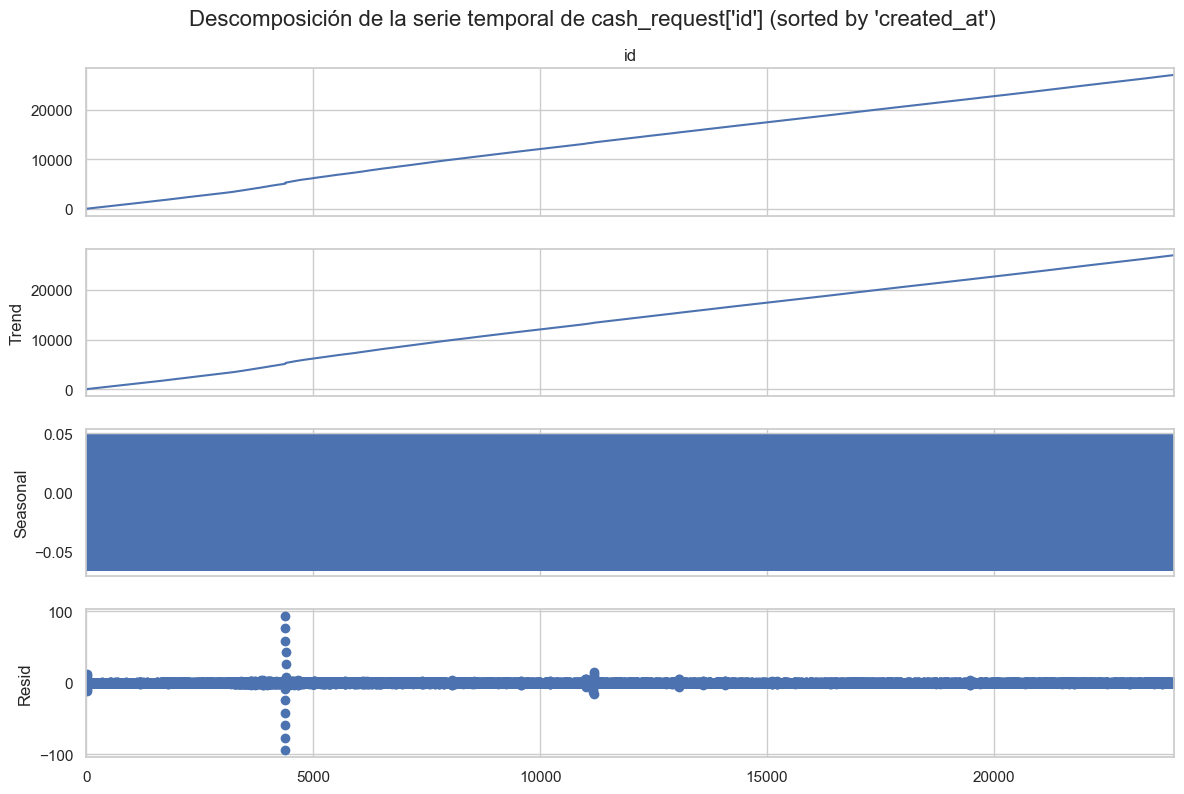

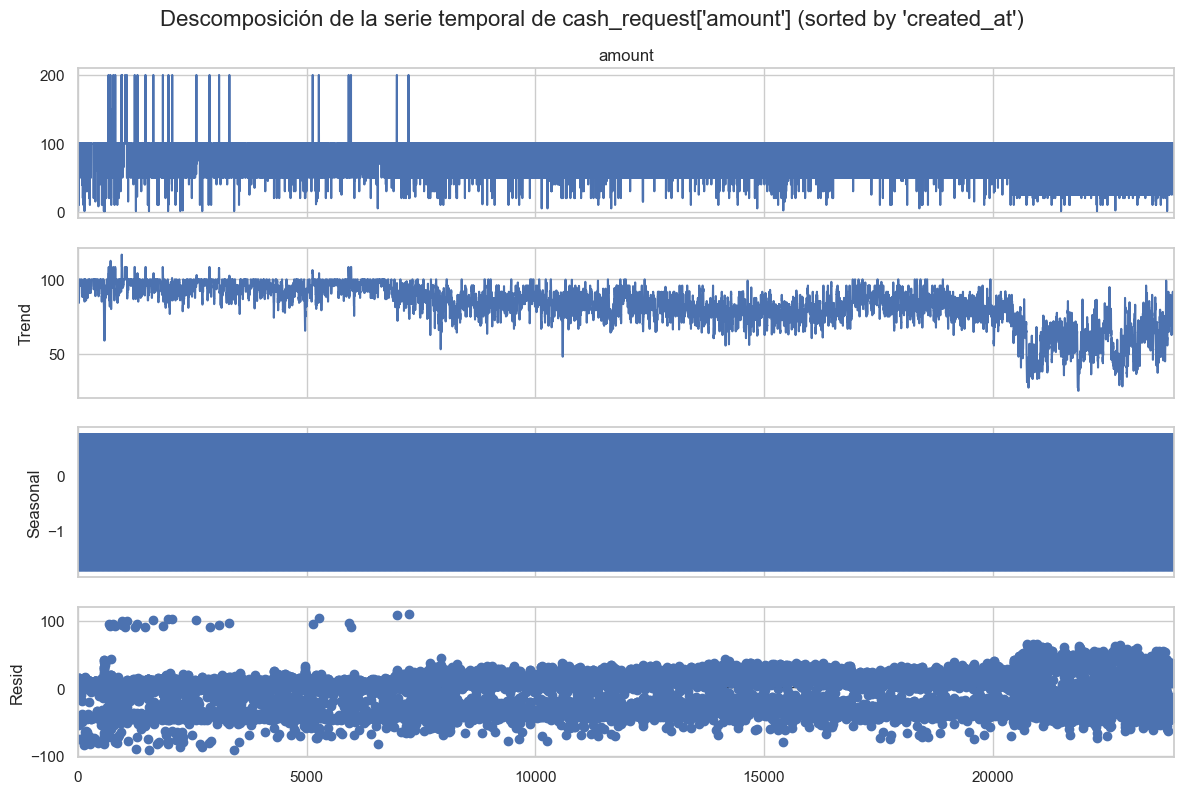

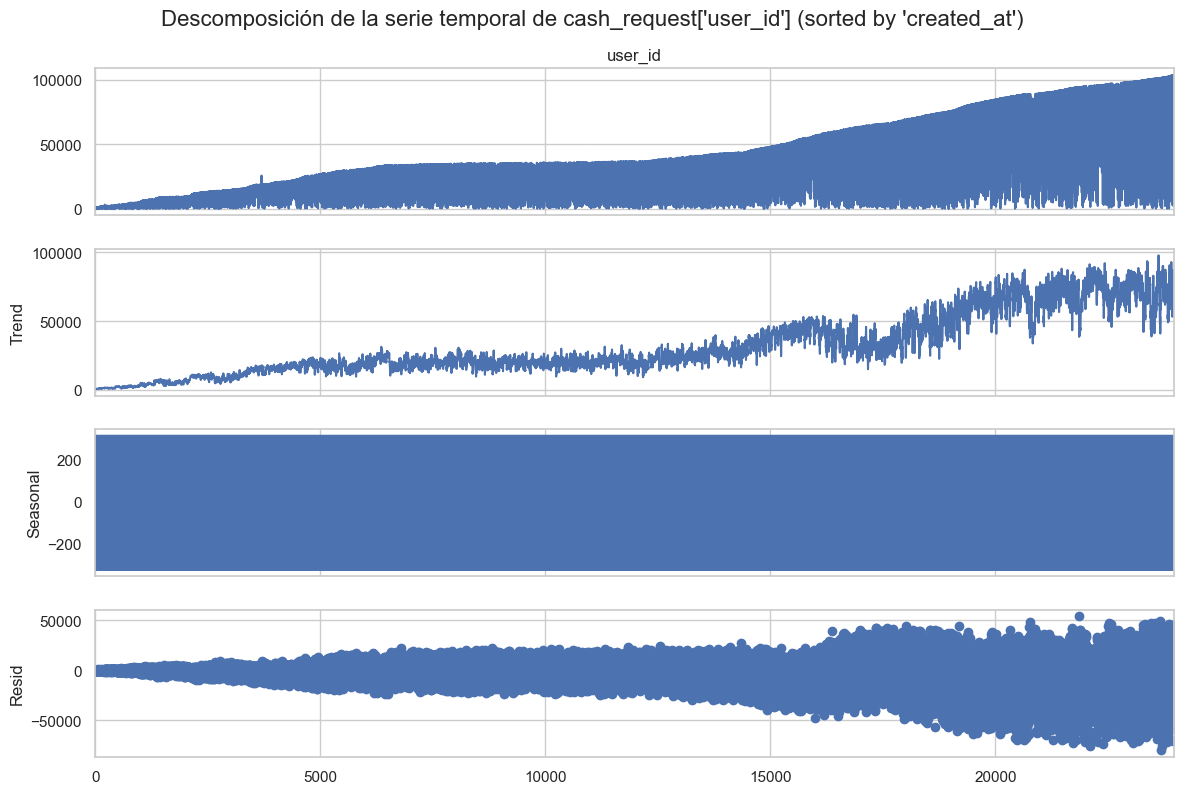

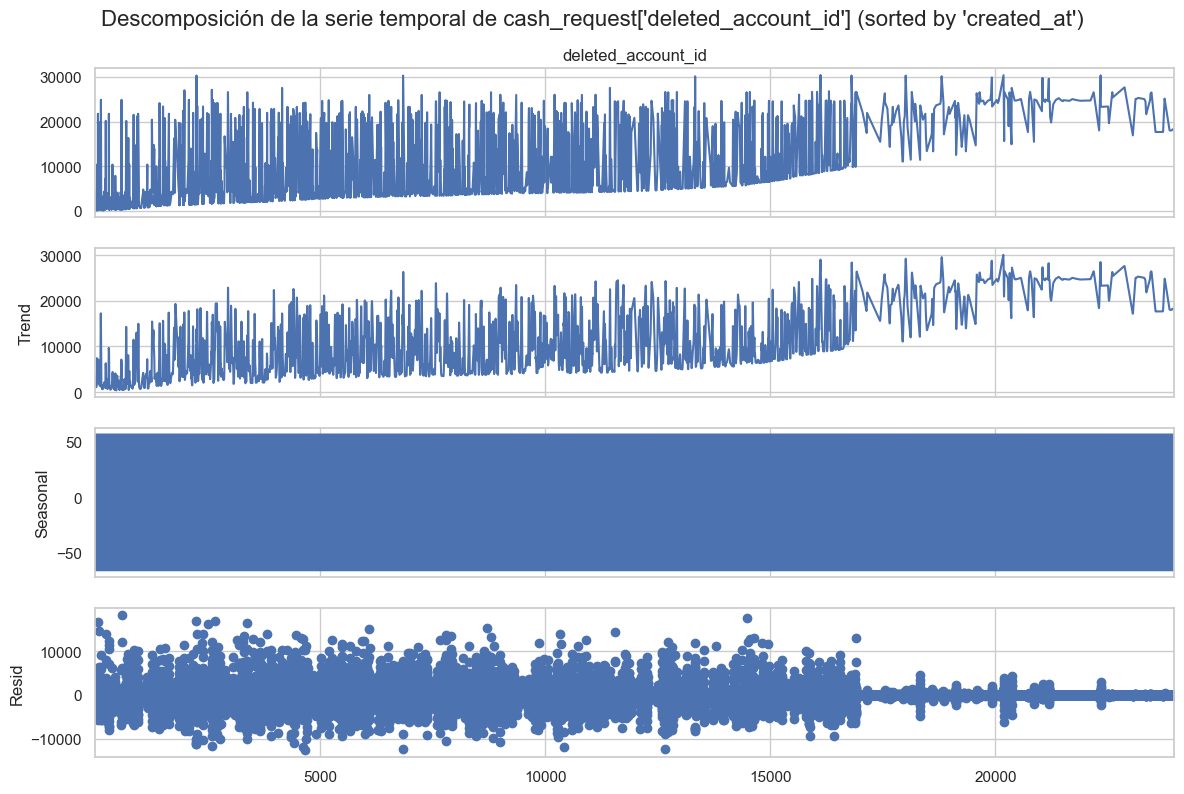

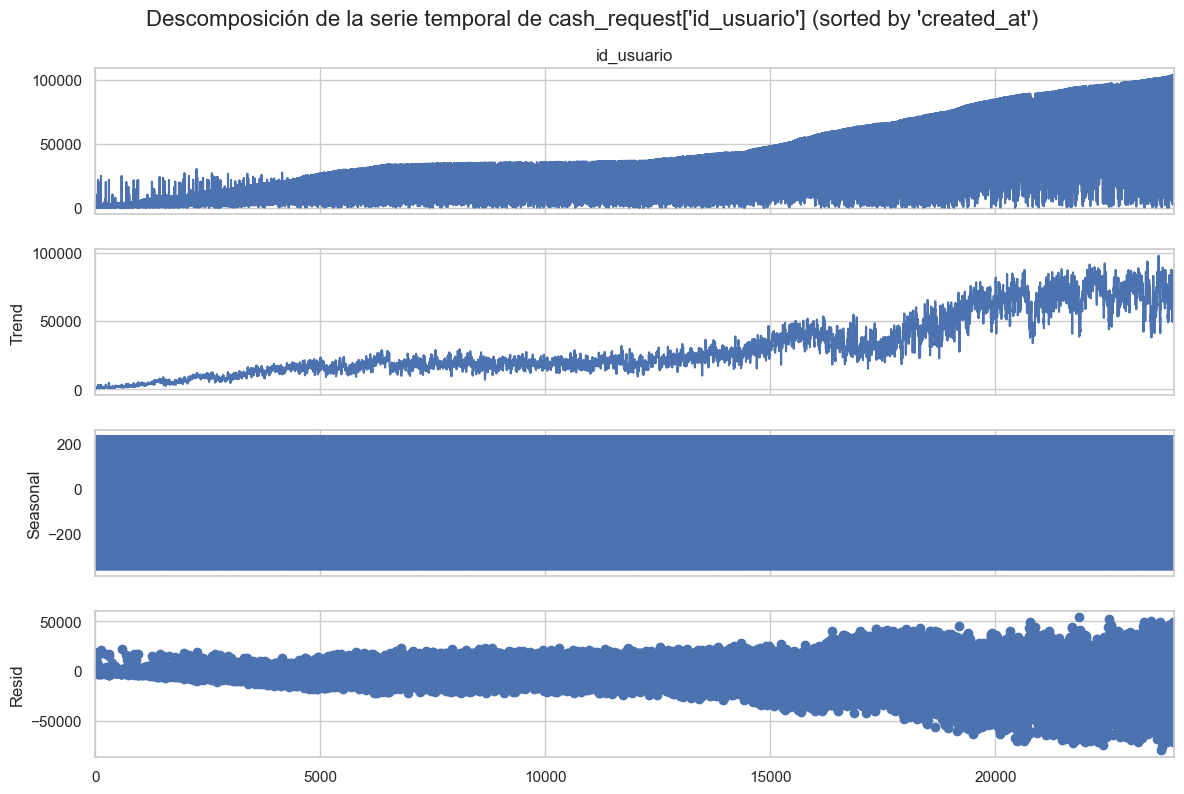

In [21]:
df = cash_by_creation
columnas_numericas = df.describe().columns.to_list()
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas:
    # Crear una copia del DataFrame para trabajar
    cash_request_copy = df[c].copy()
    # Verifica si hay valores faltantes y elimínalos o interpola
    if cash_request_copy.isnull().any():
        cash_request_copy = cash_request_copy.interpolate() # Rellenar NaN con interpolación
    # Eliminar filas con valores faltantes
    cash_request_copy = cash_request_copy.dropna()
    # Verificar que no hay valores no finitos
    if not np.isfinite(cash_request_copy).all():
        print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
        continue
    # Descomposición de la serie temporal
    descomposicion = seasonal_decompose(cash_request_copy, model='additive', period=12)
    # Graficar la descomposición
    fig = descomposicion.plot()
    # Ajustar el tamaño de la figura con matplotlib
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    plt.gcf().set_size_inches(12, 8)
    warnings.resetwarnings()
    # Ajustar el título para que no se superponga
    fig.suptitle(f'Descomposición de la serie temporal de cash_request[\'{c}\'] (sorted by \'created_at\')', fontsize=16, y=1.01)
    plt.show()

## Series de Tiempo para fees

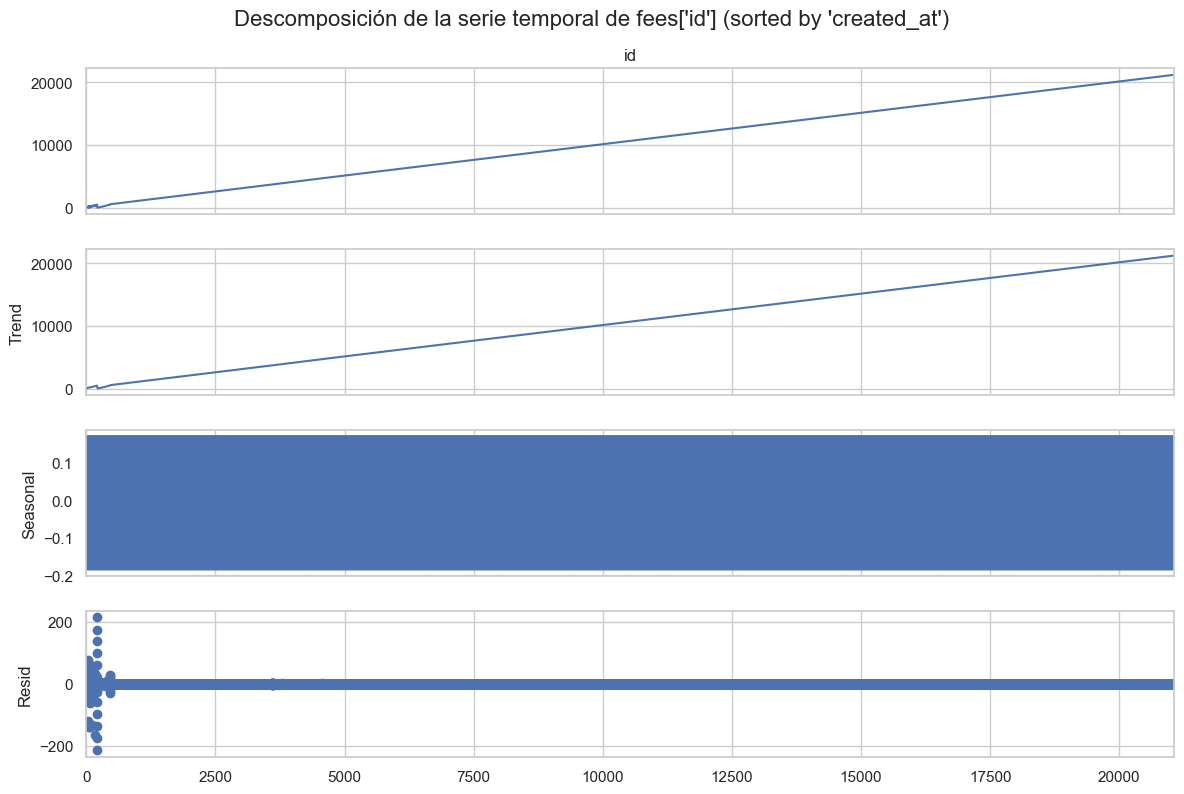

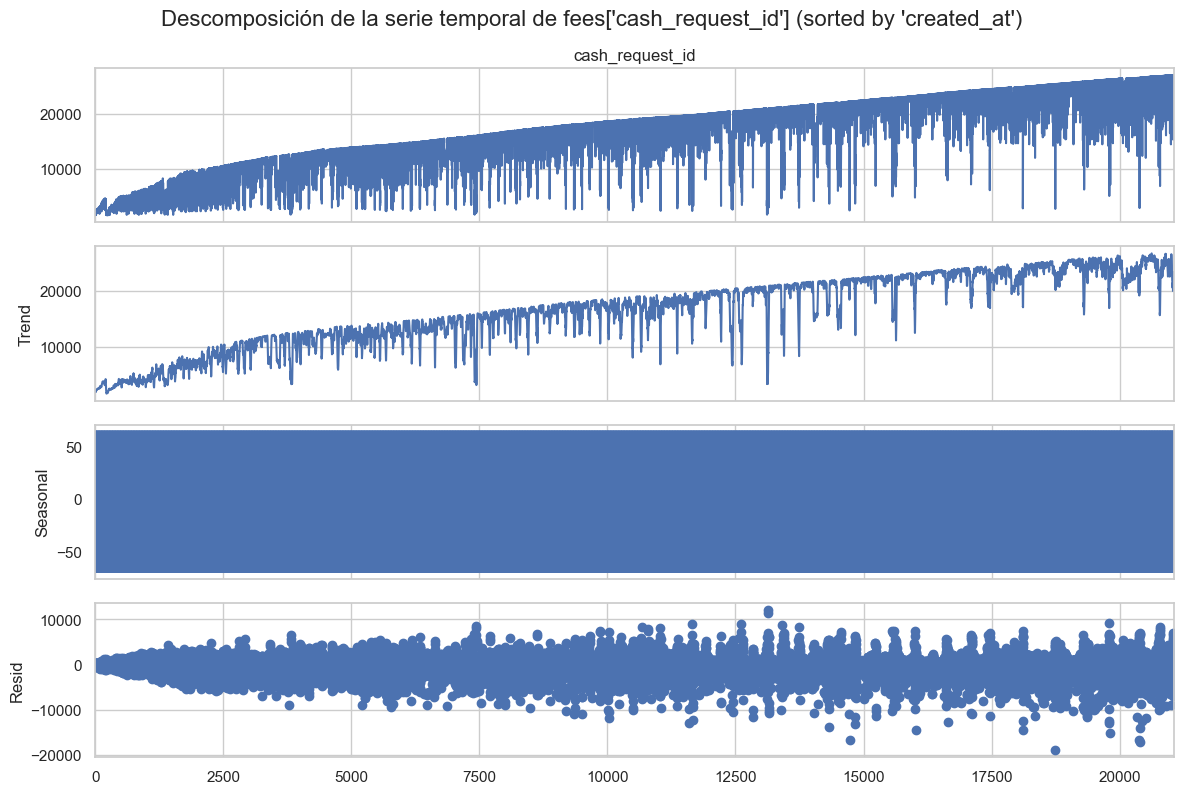

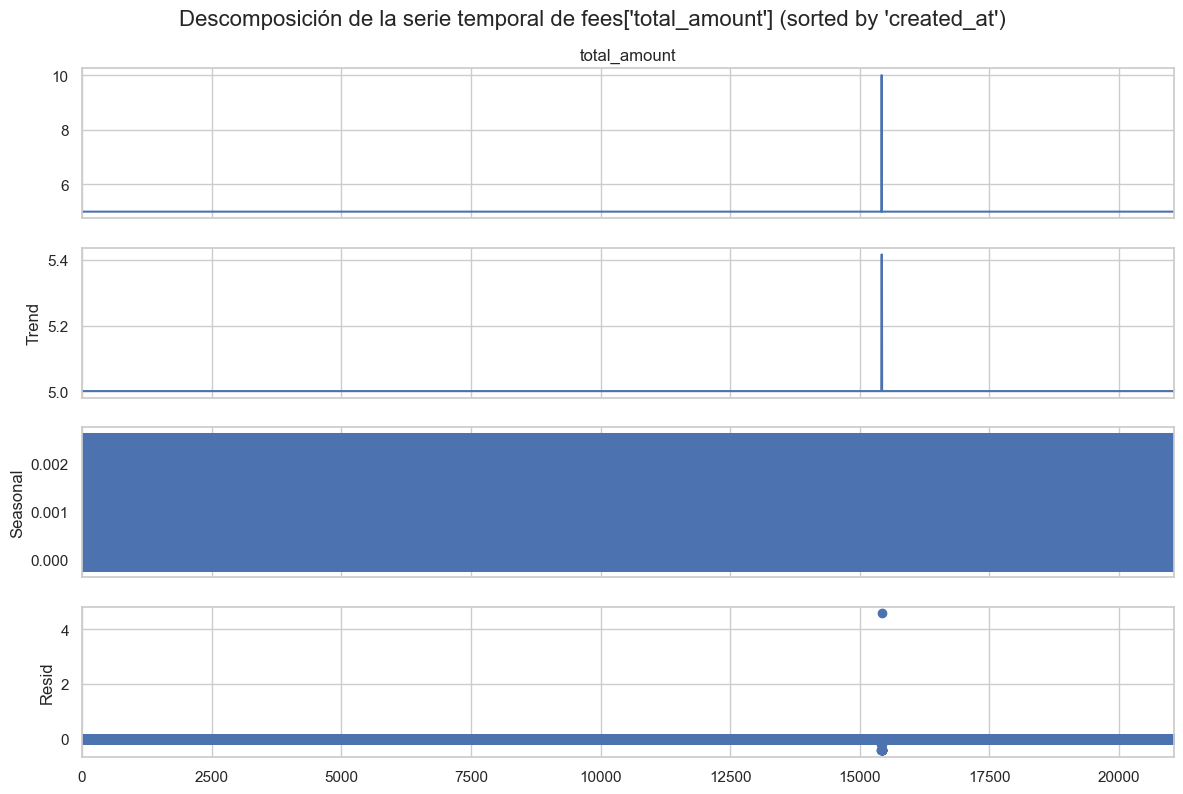

In [22]:
df = fees_by_creation
columnas_numericas = df.describe().columns.to_list()
# Descomposición de series temporales para cada columna numérica individual
for c in columnas_numericas:
    # Crear una copia del DataFrame para trabajar
    cash_request_copy = df[c].copy()
    # Verifica si hay valores faltantes y elimínalos o interpola
    if cash_request_copy.isnull().any():
        cash_request_copy = cash_request_copy.interpolate() # Rellenar NaN con interpolación
    # Eliminar filas con valores faltantes
    cash_request_copy = cash_request_copy.dropna()
    # Verificar que no hay valores no finitos
    if not np.isfinite(cash_request_copy).all():
        print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
        continue
    # Descomposición de la serie temporal
    descomposicion = seasonal_decompose(cash_request_copy, model='additive', period=12)
    # Graficar la descomposición
    fig = descomposicion.plot()
    # Ajustar el tamaño de la figura con matplotlib
    warnings.filterwarnings('ignore', category=DeprecationWarning)
    plt.gcf().set_size_inches(12, 8)
    warnings.resetwarnings()
    # Ajustar el título para que no se superponga
    fig.suptitle(f'Descomposición de la serie temporal de fees[\'{c}\'] (sorted by \'created_at\')', fontsize=16, y=1.01)
    plt.show()